In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/trained-model-b-hw/model_b_hw_3.hdf5
/kaggle/input/trained-model-b-hw/model_b_hw_2.hdf5
/kaggle/input/bengaliai-cv19/test_image_data_2.parquet
/kaggle/input/bengaliai-cv19/test_image_data_3.parquet
/kaggle/input/bengaliai-cv19/test_image_data_0.parquet
/kaggle/input/bengaliai-cv19/train.csv
/kaggle/input/bengaliai-cv19/test_image_data_1.parquet
/kaggle/input/bengaliai-cv19/class_map.csv
/kaggle/input/bengaliai-cv19/train_image_data_3.parquet
/kaggle/input/bengaliai-cv19/train_image_data_2.parquet
/kaggle/input/bengaliai-cv19/test.csv
/kaggle/input/bengaliai-cv19/sample_submission.csv
/kaggle/input/bengaliai-cv19/train_image_data_1.parquet
/kaggle/input/bengaliai-cv19/train_image_data_0.parquet
/kaggle/input/trained-model-bengali-ai-1/model_b_hw.hdf5


In [2]:
import pyarrow.parquet as pq

import pyarrow as pa

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd
import pickle

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split



import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import clone_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

import keras

import cv2

import gc



Using TensorFlow backend.


In [3]:
new_model = tf.keras.models.load_model('/kaggle/input/trained-model-b-hw/model_b_hw_3.hdf5')

In [4]:
df = pd.read_parquet('/kaggle/input/bengaliai-cv19/test_image_data_0.parquet')

for x in range(1,4):
    dt = pd.read_parquet(f'/kaggle/input/bengaliai-cv19/test_image_data_{x}.parquet')
    df = df.append(dt, ignore_index=True)
    del dt

gc.collect()
df.tail()


,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
7,Test_7,254,254,254,254,254,255,255,255,255,...,255,255,255,255,255,255,255,254,252,251
8,Test_8,251,251,249,247,247,248,249,249,249,...,252,252,252,252,252,252,252,250,250,250
9,Test_9,250,251,249,248,248,249,248,249,252,...,254,254,253,252,252,253,254,253,253,253
10,Test_10,245,246,248,249,250,248,247,250,252,...,252,252,252,253,254,254,254,254,254,254
11,Test_11,252,252,252,252,252,252,252,252,252,...,253,253,253,253,253,253,253,253,253,252


In [5]:
HEIGHT = 137
WIDTH = 236

def filter_image(image):
    size = 64
    image = cv2.resize(image,(size,size),interpolation=cv2.INTER_AREA)
    gaussian_3 = cv2.GaussianBlur(image, (9,9), 10.0)
    image = cv2.addWeighted(image, 1.5, gaussian_3, -0.5, 0, image)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]]) 
    image = cv2.filter2D(image, -1, kernel)
    ret,image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    return image

def image_resized(df, image_id, size):

    img = df[df.image_id == image_id].values[:, 1:].reshape(HEIGHT, WIDTH)
    img = np.float32(img)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #(thresh, img) = cv2.threshold(img, 150, 150, cv2.THRESH_BINARY)
    img = cv2.resize(img, (size, size))
    #new_image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    #plt.imshow(img.astype(float), cmap='gray')
    #imgUMat = np.float32(img)
    #gray_img = cv2.cvtColor(img.astype(np.float64), cv2.COLOR_BGR2GRAY)
    img = filter_image(img)
    return img
gc.collect()


0

In [6]:
testX = []

for z in range(df.shape[0]):
    testX.append(image_resized(df, f'Test_{z}', 64))

gc.collect()
df.shape[0]


12

0

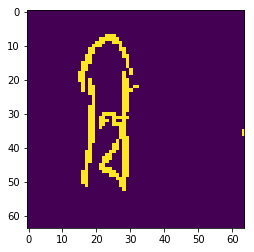

In [7]:
plt.imshow(testX[1])
plt.show
gc.collect()

In [8]:
IMG_SIZE = 64
testX = np.array(testX).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
gc.collect()

2293

In [9]:

testX = testX/255.0
gc.collect()

0

In [10]:
testX.shape
gc.collect()

0

In [11]:
lim = testX.shape[0]
gc.collect()
lim

12

In [12]:
prediction = new_model.predict(testX)
gc.collect()

685

In [13]:
del testX

In [14]:
prediction[1][1]


array([7.3419387e-06, 7.2844486e-08, 9.9998224e-01, 5.4576999e-06,
       1.5441266e-07, 4.2737613e-09, 5.0930865e-10, 4.4752746e-06,
       2.2234128e-07, 3.7556376e-09, 7.4221235e-10], dtype=float32)

In [15]:
allpredictions = []
for x in range(lim):
    allpredictions.append(np.argmax(prediction[2][x]))
    allpredictions.append(np.argmax(prediction[0][x]))
    allpredictions.append(np.argmax(prediction[1][x]))
gc.collect()
allpredictions

[0,
 3,
 0,
 0,
 93,
 2,
 0,
 19,
 0,
 0,
 115,
 0,
 0,
 55,
 4,
 0,
 115,
 2,
 5,
 23,
 9,
 0,
 137,
 7,
 0,
 119,
 9,
 0,
 133,
 10,
 4,
 148,
 1,
 0,
 21,
 2]

In [16]:
del prediction

In [17]:
rowId = []
component = ['consonant_diacritic', 'grapheme_root', 'vowel_diacritic']
for x in range(lim):
    for z in range(len(component)):
        rowId.append(df["image_id"][x]+'_'+component[z])

del component
gc.collect()
rowId

['Test_0_consonant_diacritic',
 'Test_0_grapheme_root',
 'Test_0_vowel_diacritic',
 'Test_1_consonant_diacritic',
 'Test_1_grapheme_root',
 'Test_1_vowel_diacritic',
 'Test_2_consonant_diacritic',
 'Test_2_grapheme_root',
 'Test_2_vowel_diacritic',
 'Test_3_consonant_diacritic',
 'Test_3_grapheme_root',
 'Test_3_vowel_diacritic',
 'Test_4_consonant_diacritic',
 'Test_4_grapheme_root',
 'Test_4_vowel_diacritic',
 'Test_5_consonant_diacritic',
 'Test_5_grapheme_root',
 'Test_5_vowel_diacritic',
 'Test_6_consonant_diacritic',
 'Test_6_grapheme_root',
 'Test_6_vowel_diacritic',
 'Test_7_consonant_diacritic',
 'Test_7_grapheme_root',
 'Test_7_vowel_diacritic',
 'Test_8_consonant_diacritic',
 'Test_8_grapheme_root',
 'Test_8_vowel_diacritic',
 'Test_9_consonant_diacritic',
 'Test_9_grapheme_root',
 'Test_9_vowel_diacritic',
 'Test_10_consonant_diacritic',
 'Test_10_grapheme_root',
 'Test_10_vowel_diacritic',
 'Test_11_consonant_diacritic',
 'Test_11_grapheme_root',
 'Test_11_vowel_diacritic'

In [18]:
del df

In [19]:
df_sample = pd.DataFrame(
    {
        'row_id': rowId,
        'target': allpredictions
    },
    columns = ['row_id','target'] 
)
del allpredictions
del rowId
gc.collect()
df_sample.to_csv('submission.csv',index=False)
df_sample

,row_id,target
0,Test_0_consonant_diacritic,0
1,Test_0_grapheme_root,3
2,Test_0_vowel_diacritic,0
3,Test_1_consonant_diacritic,0
4,Test_1_grapheme_root,93
5,Test_1_vowel_diacritic,2
6,Test_2_consonant_diacritic,0
7,Test_2_grapheme_root,19
8,Test_2_vowel_diacritic,0
9,Test_3_consonant_diacritic,0
